In [1]:
import pandas
import matplotlib
import numpy

In [2]:
data_1 = pandas.read_csv('pomiary/01_var_angle.csv')
data_2 = pandas.read_csv('pomiary/02_small_angle.csv')
data_3 = pandas.read_csv('pomiary/03_big_angle.csv')

In [3]:
print(data_1)

     5deg   10deg   15deg   20deg   25deg   30deg
0  2.6285  2.6343  2.6368  2.6454  2.6585  2.6701
1  2.6295  2.6346  2.6359  2.6463  2.6589  2.6711
2  2.6295  2.6344  2.6402  2.6467  2.6582  2.6714
3  2.6307  2.6366  2.6394  2.6470  2.6590  2.6709
4  2.6296  2.6358  2.6408  2.6467  2.6578  2.6701
5  2.6286  2.6350  2.6404  2.6463  2.6593  2.6685
6  2.6285  2.6342  2.6396  2.6463  2.6574  2.6698
7  2.6303  2.6350  2.6401  2.6477  2.6588  2.6696
8  2.6287  2.6352  2.6395  2.6476  2.6583  2.6694
9  2.6298  2.6350  2.6396  2.6485  2.6584  2.6708


In [4]:
print(data_1.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    5deg &   10deg &   15deg &   20deg &   25deg &   30deg \\
\midrule
0 &  2.6285 &  2.6343 &  2.6368 &  2.6454 &  2.6585 &  2.6701 \\
1 &  2.6295 &  2.6346 &  2.6359 &  2.6463 &  2.6589 &  2.6711 \\
2 &  2.6295 &  2.6344 &  2.6402 &  2.6467 &  2.6582 &  2.6714 \\
3 &  2.6307 &  2.6366 &  2.6394 &  2.6470 &  2.6590 &  2.6709 \\
4 &  2.6296 &  2.6358 &  2.6408 &  2.6467 &  2.6578 &  2.6701 \\
5 &  2.6286 &  2.6350 &  2.6404 &  2.6463 &  2.6593 &  2.6685 \\
6 &  2.6285 &  2.6342 &  2.6396 &  2.6463 &  2.6574 &  2.6698 \\
7 &  2.6303 &  2.6350 &  2.6401 &  2.6477 &  2.6588 &  2.6696 \\
8 &  2.6287 &  2.6352 &  2.6395 &  2.6476 &  2.6583 &  2.6694 \\
9 &  2.6298 &  2.6350 &  2.6396 &  2.6485 &  2.6584 &  2.6708 \\
\bottomrule
\end{tabular}



In [5]:
data_1.mean()

5deg     2.62937
10deg    2.63501
15deg    2.63923
20deg    2.64685
25deg    2.65846
30deg    2.67017
dtype: float64

In [6]:
data_1.std().round(5)


5deg     0.00078
10deg    0.00074
15deg    0.00160
20deg    0.00089
25deg    0.00057
30deg    0.00089
dtype: float64

In [7]:
angles_with_means = {'kąt (°)': [5,10,15,20,25,30], 'wartość średnia 2T (s)': data_1.mean()}
df = pandas.DataFrame(angles_with_means)
df.plot(kind='scatter', x='kąt (°)', y='wartość średnia 2T (s)')
matplotlib.pyplot.savefig('wykres-1_0.pdf')

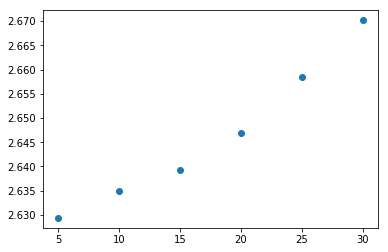

In [8]:
matplotlib.pyplot.plot(df['kąt (°)'], df['wartość średnia 2T (s)'], 'o')
matplotlib.pyplot.savefig('wykres-1_1.pdf')

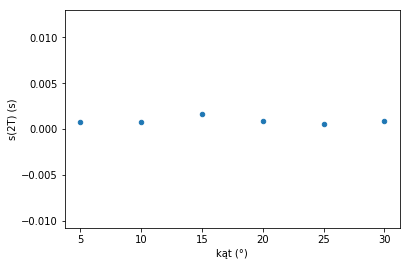

In [9]:
angles_with_std = {'kąt (°)': [5,10,15,20,25,30], 's(2T) (s)': data_1.std().round(5)}
df2 = pandas.DataFrame(angles_with_std)
df2.plot(kind='scatter', x='kąt (°)', y='s(2T) (s)')
matplotlib.pyplot.savefig('wykres-2_0.pdf',  bbox_inches='tight', pad_inches=0)

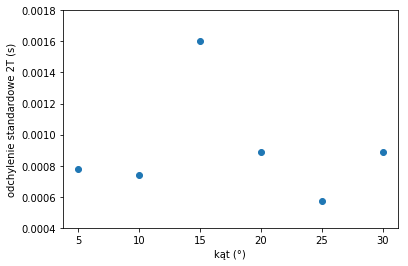

In [19]:
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.plot(df2['kąt (°)'], df2['s(2T) (s)'], 'o')
matplotlib.pyplot.xlabel('kąt (°)')
matplotlib.pyplot.ylim(0.0004,0.0018)
matplotlib.pyplot.ylabel('odchylenie standardowe 2T (s)')
#fig.set_size_inches()
matplotlib.pyplot.savefig('wykres-2_1.pdf',  bbox_inches='tight', pad_inches=0.1)

In [11]:
print(data_2.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  l (mm) &  kT (s) &          X &        X\textasciicircum2 &     Y\textasciicircum2 &         XY \\
\midrule
0 &     480 &  2.6325 &  43.885094 &  1925.9015 &  230400 &  21064.845 \\
1 &     460 &  2.6918 &  45.884484 &  2105.3859 &  211600 &  21106.863 \\
2 &     440 &  2.7515 &  47.942349 &  2298.4688 &  193600 &  21094.634 \\
3 &     420 &  2.8101 &  50.006196 &  2500.6196 &  176400 &  21002.602 \\
4 &     400 &  2.8676 &  52.073578 &  2711.6575 &  160000 &  20829.431 \\
5 &     380 &  2.9218 &  54.060647 &  2922.5536 &  144400 &  20543.046 \\
\bottomrule
\end{tabular}



In [12]:
data_2.sum()[3]


14464.586899999998

In [13]:
n = data_2.count()[0]
s_vec = data_2.sum()
a = ( n * s_vec[5] - s_vec[2] * s_vec[0] ) / ( n * s_vec[3] - s_vec[2] ** 2)
b = ( s_vec[0] - a * s_vec[2] ) / n
a, b

(-9.788606211052448, 909.4008197941909)

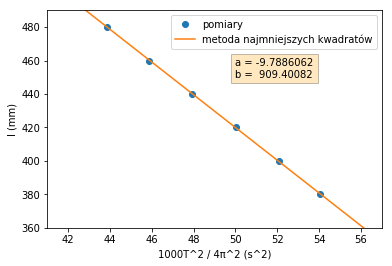

In [14]:
matplotlib.pyplot.plot(data_2['X'], data_2['l (mm)'], 'o')
matplotlib.pyplot.xlabel('1000T^2 / 4π^2 (s^2)')
matplotlib.pyplot.ylabel('l (mm)')
matplotlib.pyplot.xlim(41,57)
matplotlib.pyplot.ylim(360,490)

x = numpy.linspace(40, 58)
y = a*x + b
matplotlib.pyplot.plot(x, y)

matplotlib.pyplot.text(50,450, 'a = {}\nb =  {}'.format(a.round(7), b.round(5)), bbox=dict(facecolor='orange', alpha=0.25))
matplotlib.pyplot.legend(['pomiary','metoda najmniejszych kwadratów'])

matplotlib.pyplot.savefig('wykres-3_0.pdf')

In [15]:
print(data_3.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  l (mm) &  kT (s) &         X &        X\textasciicircum2 &     Y\textasciicircum2 &         XY \\
\midrule
0 &     480 &  2.6582 &  44.74614 &  2002.2170 &  230400 &  21478.147 \\
1 &     460 &  2.7160 &  46.71322 &  2182.1249 &  211600 &  21488.081 \\
2 &     440 &  2.7764 &  48.81399 &  2382.8056 &  193600 &  21478.136 \\
3 &     420 &  2.8339 &  50.85683 &  2586.4132 &  176400 &  21359.869 \\
4 &     400 &  2.8918 &  52.95620 &  2804.3591 &  160000 &  21182.480 \\
5 &     380 &  2.9494 &  55.08681 &  3034.5566 &  144400 &  20932.988 \\
\bottomrule
\end{tabular}



In [16]:
for d in data_3.sum():
    print(d)

2580.0
16.8257
299.17319
14992.476399999998
1116400.0
127919.701


In [17]:
n = data_3.count()[0]
s_vec = data_3.sum()
a = ( n * s_vec[5] - s_vec[2] * s_vec[0] ) / ( n * s_vec[3] - s_vec[2] ** 2)
b = ( s_vec[0] - a * s_vec[2] ) / n
a, b

(-9.658012295779917, 911.5697245979503)

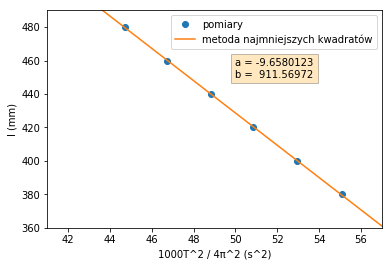

In [18]:
matplotlib.pyplot.plot(data_3['X'], data_3['l (mm)'], 'o')
matplotlib.pyplot.xlabel('1000T^2 / 4π^2 (s^2)')
matplotlib.pyplot.ylabel('l (mm)')
matplotlib.pyplot.xlim(41,57)
matplotlib.pyplot.ylim(360,490)

x = numpy.linspace(40, 58)
y = a*x + b
matplotlib.pyplot.plot(x, y)


matplotlib.pyplot.text(50,450, 'a = {}\nb =  {}'.format(a.round(7), b.round(5)), bbox=dict(facecolor='orange', alpha=0.25))

matplotlib.pyplot.legend(['pomiary','metoda najmniejszych kwadratów'])

matplotlib.pyplot.savefig('wykres-4_0.pdf')